# Analyse der Chemischen Eigenschaften von Codons bzw. Aminosäuren

Zu den analysieren sind folgende Eigenschaften:
- Anzahl der Wasserstoffbrücken
- Die Ringstruktur der Base
- Die Chemische Gruppe der Base

Die Eigenschaften werden exemplarisch für jeweils eine Codongruppe mit Degeneriertheit 2, 4 und 6 aufgezeigt
Durch die Analyse soll untersucht werden ob die chemischen Eigenschaften der Codons einen Einfluss auf den CUB (Codon Usage Bias) haben, bzw. ob sich durch deren Betrachtung eine "Regel" ableiten lässt.

## Einlesen der gesäuberten, und serialisierten Daten
Die gesäuberten und serialisierten Daten der einzelnen Organismen werden zunächst in `DataFrame`'s eingelesen zur erleichterten weiterverarbeitung. Folgend werden exemplarisch 3 Aminosäuren mit unterschiedlicher degeneriertheit analysiert. Die Wahl anderer Aminosäuren kann über die Angabe ihres [`IUPAC`](https://www.bioinformatics.org/sms/iupac.html) Codes in `cp.aminoDecoding` realisiert werden


In [9]:
import pandas as pd
import sys
sys.path.append('../scripts')
import chemicalProperty as cp


organism_names = ['E.Coli','Drosophila.Melanogaster','Homo.Sapiens','saccharomyces.cerevisiae']
for organism in organism_names:
    name = organism.replace(".","_").lower()
    globals()[f'raw_{name}_df'] = pd.read_pickle(f'../data/{organism}/cleanedData.pkl') 

## Teilmengen 
Im folgenden werden 3 Aminosäuren aus den jeweiligen Organismen, die Aminosäuren haben jeweils eine Degeneriertheit von 2, 4 sowie 6. Die Degeneriertheit beschreibt wie viele Codons die jeweilige Aminosäure im Genetischen Code codieren. Die exemplarisch gewählten Aminosäuren sind: Phenylalanine (`F`), Alanine (`A`) sowie Arginine (`R`)

In [7]:
scores_coli_phenylalanine = cp.scoreByChemProp(raw_e_coli_df,cp.aminoDecoding['F'],False) #Phenylalanine 2
scores_coli_alanine = cp.scoreByChemProp(raw_e_coli_df,cp.aminoDecoding['A'],False) #Alanine 4
scores_coli_arginine = cp.scoreByChemProp(raw_e_coli_df,cp.aminoDecoding['R'],False) #Arginine 6

In [10]:
scores_fly_phenylalanine = cp.scoreByChemProp(raw_drosophila_melanogaster_df,cp.aminoDecoding['F'],False)
scores_fly_alanine = cp.scoreByChemProp(raw_drosophila_melanogaster_df,cp.aminoDecoding['A'],False)
scores_fly_arginine = cp.scoreByChemProp(raw_drosophila_melanogaster_df,cp.aminoDecoding['R'],False)


## Visualisierung der Chemischen Eigenschaften

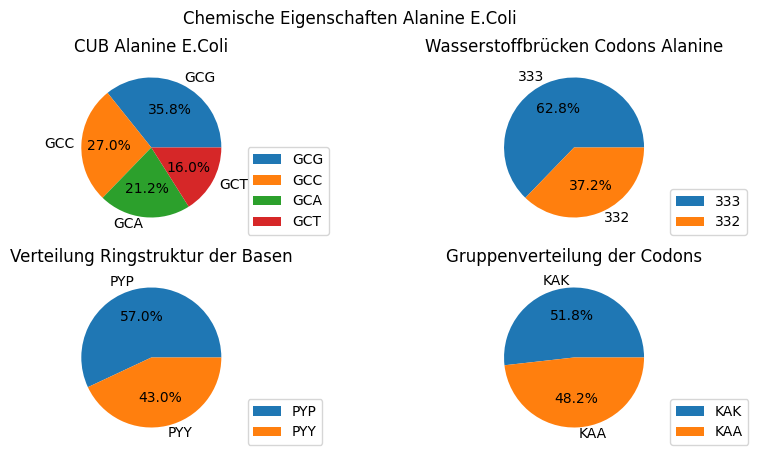

In [8]:
cp.plot_chemical_properties(scores_coli_alanine)

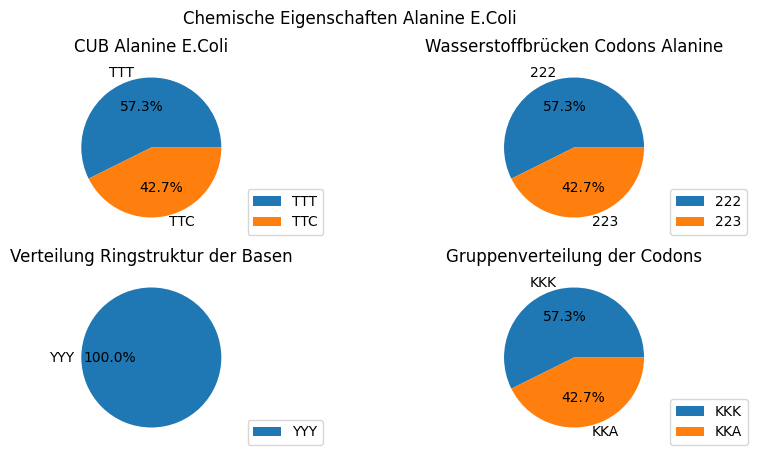

In [11]:
#Chemische Eigenschaften Phenylalanine E.Coli
cp.plot_chemical_properties(scores_coli_phenylalanine)

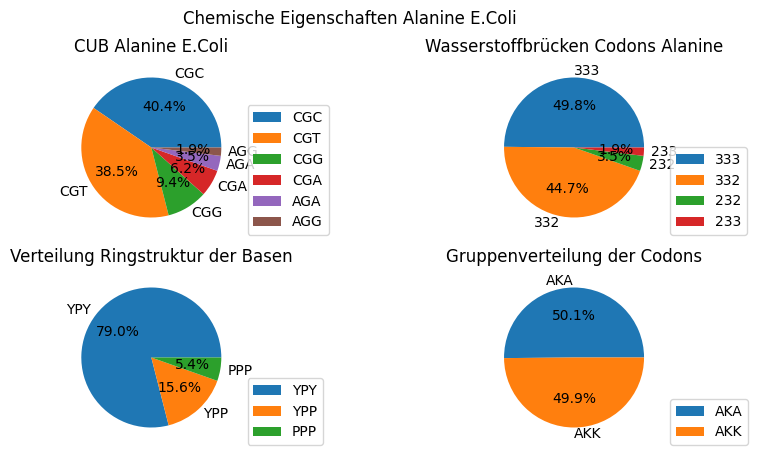

In [12]:
#Chemische Eigenschaften Arginine E.Coli
cp.plot_chemical_properties(scores_coli_arginine)

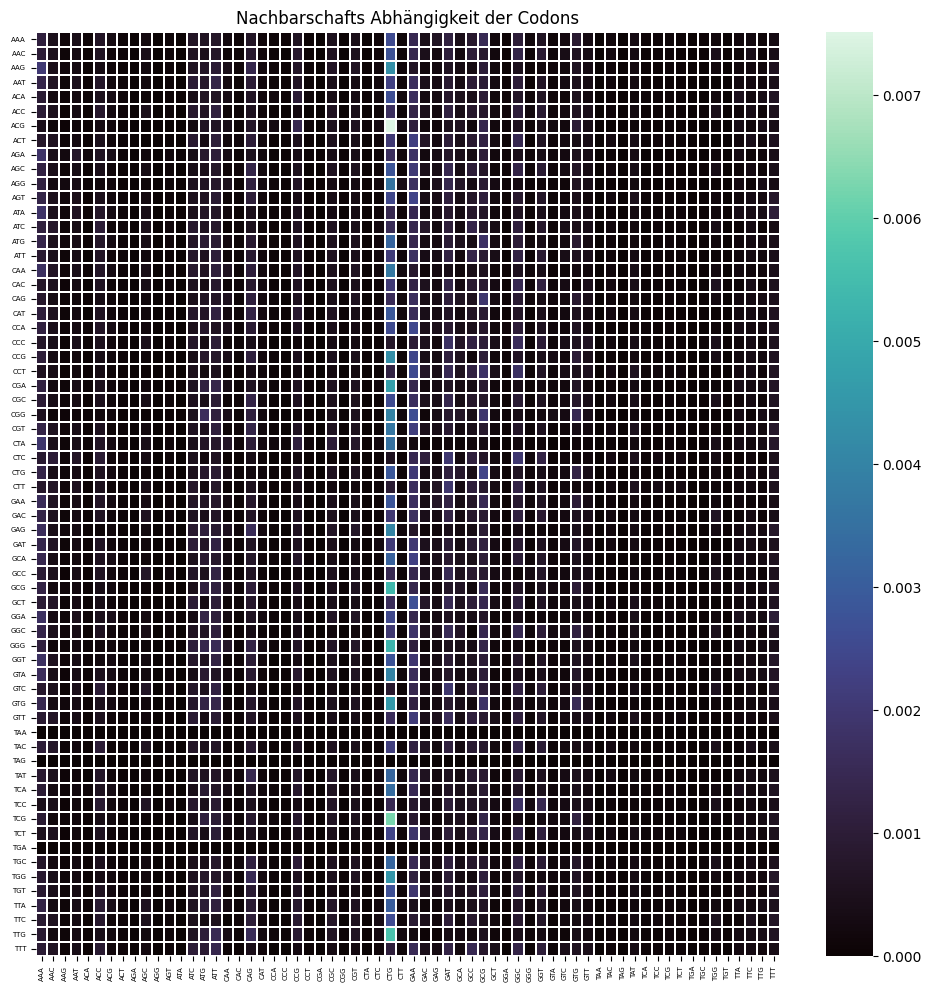

In [14]:
cp.kindaBLOSUMcodons(raw_e_coli_df['sequence'].tolist())

In [ ]:
cp.kindaBLOSUMcodons(raw_drosophila_melanogaster_df['sequence'].tolist())

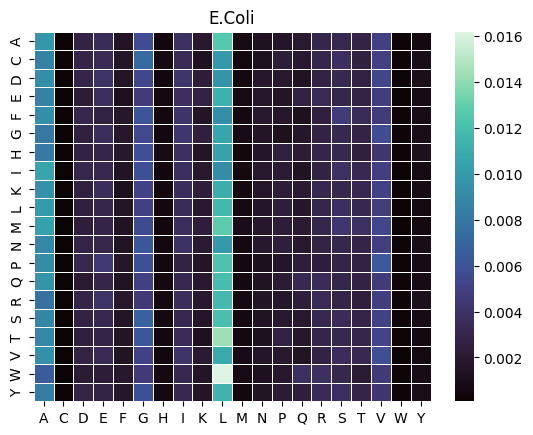

In [3]:
cp.kindaBLOSUMaminos(raw_e_coli_df['translation'].apply(lambda x : x.seq).tolist(),'E.Coli')

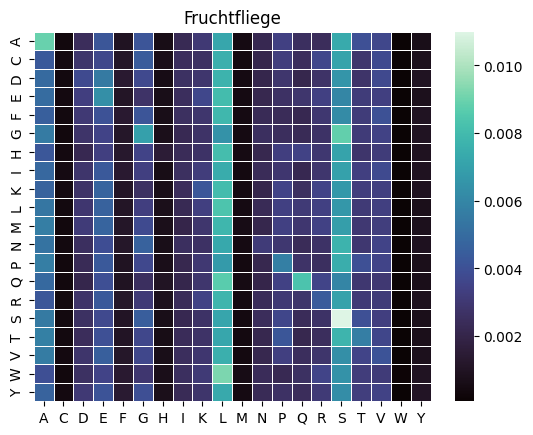

In [13]:
cp.kindaBLOSUMaminos(raw_drosophila_melanogaster_df['translation'].apply(lambda x : x.seq).tolist(),'Fruchtfliege')